In [2]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from LSTM import *
from LSTMbis import *
import pandas as pd
import numpy as np
import torch.utils.data as utils
import time

import pdb

torch.manual_seed(1)

In [3]:
import os
data = {}
a=0
for i in os.listdir('./new_data/4'):

    if i.endswith('.txt'):
        a = a+1
        data['%s'%a] = pd.read_csv('new_data/4/%s'%i, header = None, 
                                         names = ['frameNb','id', 'x','y'],delimiter=' ')

In [8]:
a = 0
inputs = np.zeros([10,len(data),2])
gt = np.zeros([11,len(data),2])

for i in data:
    inputs[:,a,:] = np.array(data['%s'%i].loc[0:9,['x','y']])
    gt[:,a,:] = np.array(data['%s'%i].loc[9:,['x','y']])
    a +=1


inputs = torch.from_numpy(inputs).float()
gt = torch.from_numpy(gt).float()
inputs = inputs.permute([1,0,2])
gt = gt.permute([1,0,2])

In [9]:
from torch import optim

lstm = LSTM(2)
optimizer = optim.SGD(lstm.parameters(), lr=0.1)
criterion = nn.MSELoss()

In [10]:


traindataset = utils.TensorDataset(inputs, gt[:,1:,:])
trainloader = utils.DataLoader(traindataset, batch_size=5, shuffle=True)

epochs = 200
steps = 0
print_every = 100
running_loss = 0 #### DOD

for e in range(epochs):
    start = time.time()
    for train_coord, ground_tru in iter(trainloader):
        steps += 1
        
        train_coord = train_coord.permute([1,0,2])
        ground_tru = ground_tru.permute([1,0,2])

        in_train = Variable(train_coord)
        targets = Variable(ground_tru)
        optimizer.zero_grad()
        #print(in_train.shape)
        #print(targets.shape)
        #pdb.set_trace()
        out = lstm.forward(in_train)
        loss = criterion(out, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]

    
        if steps % print_every == 0:
                stop = time.time()
                # Test accuracy
                outp = out.data.numpy()
                gt_acc = ground_tru.numpy()
                accuracy = np.mean(sum(sum(outp == gt_acc))/(18*10*2))
                print("Epoch: {}/{}..".format(e+1, epochs),
                  "Loss: {:.4f}..".format(running_loss/print_every),
                  "Test accuracy: {:.4f}..".format(accuracy),
                  "{:.4f} s/batch".format((stop - start)/print_every)
                 )
                running_loss = 0
                start = time.time()

/Users/rodolphefarrando/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 1/200.. Loss: 9.1449.. Test accuracy: 0.0000.. 0.0112 s/batch
Epoch: 1/200.. Loss: 4.8481.. Test accuracy: 0.0000.. 0.0037 s/batch
Epoch: 1/200.. Loss: 3.4075.. Test accuracy: 0.0000.. 0.0039 s/batch
Epoch: 1/200.. Loss: 3.6052.. Test accuracy: 0.0000.. 0.0039 s/batch
Epoch: 2/200.. Loss: 2.6832.. Test accuracy: 0.0000.. 0.0003 s/batch
Epoch: 2/200.. Loss: 3.3568.. Test accuracy: 0.0000.. 0.0036 s/batch
Epoch: 2/200.. Loss: 3.2316.. Test accuracy: 0.0000.. 0.0059 s/batch
Epoch: 2/200.. Loss: 3.0773.. Test accuracy: 0.0000.. 0.0063 s/batch
Epoch: 2/200.. Loss: 2.3692.. Test accuracy: 0.0000.. 0.0034 s/batch
Epoch: 3/200.. Loss: 3.1695.. Test accuracy: 0.0000.. 0.0007 s/batch
Epoch: 3/200.. Loss: 2.9205.. Test accuracy: 0.0000.. 0.0034 s/batch
Epoch: 3/200.. Loss: 2.3842.. Test accuracy: 0.0000.. 0.0036 s/batch
Epoch: 3/200.. Loss: 3.7321.. Test accuracy: 0.0000.. 0.0053 s/batch
Epoch: 3/200.. Loss: 3.0358.. Test accuracy: 0.0000.. 0.0040 s/batch
Epoch: 4/200.. Loss: 2.4508.. Test

Epoch: 25/200.. Loss: 2.0509.. Test accuracy: 0.0000.. 0.0084 s/batch
Epoch: 25/200.. Loss: 2.0746.. Test accuracy: 0.0000.. 0.0086 s/batch
Epoch: 25/200.. Loss: 2.3518.. Test accuracy: 0.0000.. 0.0079 s/batch
Epoch: 25/200.. Loss: 1.9346.. Test accuracy: 0.0000.. 0.0082 s/batch
Epoch: 26/200.. Loss: 2.6094.. Test accuracy: 0.0000.. 0.0026 s/batch
Epoch: 26/200.. Loss: 2.2015.. Test accuracy: 0.0000.. 0.0083 s/batch
Epoch: 26/200.. Loss: 1.7422.. Test accuracy: 0.0000.. 0.0120 s/batch
Epoch: 26/200.. Loss: 2.5734.. Test accuracy: 0.0000.. 0.0122 s/batch
Epoch: 26/200.. Loss: 1.7168.. Test accuracy: 0.0000.. 0.0050 s/batch
Epoch: 27/200.. Loss: 2.0659.. Test accuracy: 0.0000.. 0.0085 s/batch
Epoch: 27/200.. Loss: 2.3011.. Test accuracy: 0.0000.. 0.0034 s/batch
Epoch: 27/200.. Loss: 2.0788.. Test accuracy: 0.0000.. 0.0034 s/batch
Epoch: 27/200.. Loss: 2.0361.. Test accuracy: 0.0000.. 0.0036 s/batch
Epoch: 27/200.. Loss: 2.2746.. Test accuracy: 0.0000.. 0.0035 s/batch
Epoch: 28/200.. Loss

Epoch: 49/200.. Loss: 2.3393.. Test accuracy: 0.0000.. 0.0043 s/batch
Epoch: 49/200.. Loss: 1.7783.. Test accuracy: 0.0000.. 0.0054 s/batch
Epoch: 49/200.. Loss: 2.1098.. Test accuracy: 0.0000.. 0.0036 s/batch
Epoch: 50/200.. Loss: 2.1795.. Test accuracy: 0.0000.. 0.0031 s/batch
Epoch: 50/200.. Loss: 1.9562.. Test accuracy: 0.0000.. 0.0032 s/batch
Epoch: 50/200.. Loss: 2.0805.. Test accuracy: 0.0000.. 0.0033 s/batch
Epoch: 50/200.. Loss: 2.0952.. Test accuracy: 0.0000.. 0.0048 s/batch
Epoch: 50/200.. Loss: 1.9912.. Test accuracy: 0.0000.. 0.0032 s/batch
Epoch: 51/200.. Loss: 2.7105.. Test accuracy: 0.0000.. 0.0032 s/batch
Epoch: 51/200.. Loss: 1.7010.. Test accuracy: 0.0000.. 0.0032 s/batch
Epoch: 51/200.. Loss: 1.8368.. Test accuracy: 0.0000.. 0.0034 s/batch
Epoch: 51/200.. Loss: 1.7833.. Test accuracy: 0.0000.. 0.0034 s/batch
Epoch: 52/200.. Loss: 2.1519.. Test accuracy: 0.0000.. 0.0003 s/batch
Epoch: 52/200.. Loss: 1.9746.. Test accuracy: 0.0000.. 0.0049 s/batch
Epoch: 52/200.. Loss

Epoch: 74/200.. Loss: 1.8887.. Test accuracy: 0.0000.. 0.0038 s/batch
Epoch: 74/200.. Loss: 1.6203.. Test accuracy: 0.0000.. 0.0043 s/batch
Epoch: 74/200.. Loss: 2.3087.. Test accuracy: 0.0000.. 0.0033 s/batch
Epoch: 74/200.. Loss: 2.7086.. Test accuracy: 0.0000.. 0.0032 s/batch
Epoch: 75/200.. Loss: 1.9142.. Test accuracy: 0.0000.. 0.0013 s/batch
Epoch: 75/200.. Loss: 2.5147.. Test accuracy: 0.0000.. 0.0044 s/batch
Epoch: 75/200.. Loss: 1.7503.. Test accuracy: 0.0000.. 0.0040 s/batch
Epoch: 75/200.. Loss: 2.4210.. Test accuracy: 0.0000.. 0.0043 s/batch
Epoch: 75/200.. Loss: 1.9757.. Test accuracy: 0.0000.. 0.0038 s/batch
Epoch: 76/200.. Loss: 1.8225.. Test accuracy: 0.0000.. 0.0016 s/batch
Epoch: 76/200.. Loss: 2.1616.. Test accuracy: 0.0000.. 0.0033 s/batch
Epoch: 76/200.. Loss: 2.1701.. Test accuracy: 0.0000.. 0.0033 s/batch
Epoch: 76/200.. Loss: 1.6545.. Test accuracy: 0.0000.. 0.0033 s/batch
Epoch: 76/200.. Loss: 1.9321.. Test accuracy: 0.0000.. 0.0069 s/batch
Epoch: 77/200.. Loss

Epoch: 99/200.. Loss: 2.1197.. Test accuracy: 0.0000.. 0.0040 s/batch
Epoch: 99/200.. Loss: 1.9077.. Test accuracy: 0.0000.. 0.0039 s/batch
Epoch: 99/200.. Loss: 2.0132.. Test accuracy: 0.0000.. 0.0035 s/batch
Epoch: 99/200.. Loss: 1.9365.. Test accuracy: 0.0000.. 0.0026 s/batch
Epoch: 99/200.. Loss: 1.8812.. Test accuracy: 0.0000.. 0.0028 s/batch
Epoch: 100/200.. Loss: 1.7335.. Test accuracy: 0.0000.. 0.0024 s/batch
Epoch: 100/200.. Loss: 2.5032.. Test accuracy: 0.0000.. 0.0034 s/batch
Epoch: 100/200.. Loss: 1.9583.. Test accuracy: 0.0000.. 0.0044 s/batch
Epoch: 100/200.. Loss: 2.2257.. Test accuracy: 0.0000.. 0.0038 s/batch
Epoch: 100/200.. Loss: 2.0987.. Test accuracy: 0.0000.. 0.0035 s/batch
Epoch: 101/200.. Loss: 2.4730.. Test accuracy: 0.0000.. 0.0036 s/batch
Epoch: 101/200.. Loss: 1.5360.. Test accuracy: 0.0000.. 0.0032 s/batch
Epoch: 101/200.. Loss: 2.0487.. Test accuracy: 0.0000.. 0.0036 s/batch
Epoch: 101/200.. Loss: 1.9599.. Test accuracy: 0.0000.. 0.0042 s/batch
Epoch: 102/

Epoch: 123/200.. Loss: 2.1725.. Test accuracy: 0.0000.. 0.0055 s/batch
Epoch: 123/200.. Loss: 2.3311.. Test accuracy: 0.0000.. 0.0151 s/batch
Epoch: 123/200.. Loss: 1.5592.. Test accuracy: 0.0000.. 0.0056 s/batch
Epoch: 123/200.. Loss: 1.8902.. Test accuracy: 0.0000.. 0.0063 s/batch
Epoch: 123/200.. Loss: 2.0028.. Test accuracy: 0.0000.. 0.0036 s/batch
Epoch: 124/200.. Loss: 2.1272.. Test accuracy: 0.0000.. 0.0015 s/batch
Epoch: 124/200.. Loss: 1.7933.. Test accuracy: 0.0000.. 0.0073 s/batch
Epoch: 124/200.. Loss: 1.5613.. Test accuracy: 0.0000.. 0.0108 s/batch
Epoch: 124/200.. Loss: 2.0615.. Test accuracy: 0.0000.. 0.0046 s/batch
Epoch: 124/200.. Loss: 2.1215.. Test accuracy: 0.0000.. 0.0038 s/batch
Epoch: 125/200.. Loss: 2.0455.. Test accuracy: 0.0000.. 0.0027 s/batch
Epoch: 125/200.. Loss: 1.6685.. Test accuracy: 0.0000.. 0.0120 s/batch
Epoch: 125/200.. Loss: 1.7915.. Test accuracy: 0.0000.. 0.0059 s/batch
Epoch: 125/200.. Loss: 2.0876.. Test accuracy: 0.0000.. 0.0039 s/batch
Epoch:

Epoch: 146/200.. Loss: 2.0068.. Test accuracy: 0.0000.. 0.0036 s/batch
Epoch: 146/200.. Loss: 1.9842.. Test accuracy: 0.0000.. 0.0058 s/batch
Epoch: 147/200.. Loss: 1.6340.. Test accuracy: 0.0000.. 0.0022 s/batch
Epoch: 147/200.. Loss: 2.2700.. Test accuracy: 0.0000.. 0.0036 s/batch
Epoch: 147/200.. Loss: 1.4652.. Test accuracy: 0.0000.. 0.0035 s/batch
Epoch: 147/200.. Loss: 2.2666.. Test accuracy: 0.0000.. 0.0039 s/batch
Epoch: 147/200.. Loss: 2.1439.. Test accuracy: 0.0000.. 0.0063 s/batch
Epoch: 148/200.. Loss: 2.0567.. Test accuracy: 0.0000.. 0.0035 s/batch
Epoch: 148/200.. Loss: 2.1247.. Test accuracy: 0.0000.. 0.0047 s/batch
Epoch: 148/200.. Loss: 1.9610.. Test accuracy: 0.0000.. 0.0045 s/batch
Epoch: 148/200.. Loss: 1.8079.. Test accuracy: 0.0000.. 0.0048 s/batch
Epoch: 148/200.. Loss: 1.7104.. Test accuracy: 0.0000.. 0.0036 s/batch
Epoch: 149/200.. Loss: 1.6629.. Test accuracy: 0.0000.. 0.0029 s/batch
Epoch: 149/200.. Loss: 2.0791.. Test accuracy: 0.0000.. 0.0037 s/batch
Epoch:

Epoch: 170/200.. Loss: 1.9898.. Test accuracy: 0.0000.. 0.0150 s/batch
Epoch: 170/200.. Loss: 2.0560.. Test accuracy: 0.0000.. 0.0140 s/batch
Epoch: 170/200.. Loss: 1.8085.. Test accuracy: 0.0000.. 0.0034 s/batch
Epoch: 170/200.. Loss: 1.7038.. Test accuracy: 0.0000.. 0.0040 s/batch
Epoch: 171/200.. Loss: 1.9311.. Test accuracy: 0.0000.. 0.0051 s/batch
Epoch: 171/200.. Loss: 1.5199.. Test accuracy: 0.0000.. 0.0040 s/batch
Epoch: 171/200.. Loss: 2.5465.. Test accuracy: 0.0000.. 0.0037 s/batch
Epoch: 171/200.. Loss: 1.7970.. Test accuracy: 0.0000.. 0.0034 s/batch
Epoch: 172/200.. Loss: 1.6740.. Test accuracy: 0.0000.. 0.0013 s/batch
Epoch: 172/200.. Loss: 1.6038.. Test accuracy: 0.0000.. 0.0114 s/batch
Epoch: 172/200.. Loss: 1.9615.. Test accuracy: 0.0000.. 0.0152 s/batch
Epoch: 172/200.. Loss: 2.4586.. Test accuracy: 0.0000.. 0.0109 s/batch
Epoch: 172/200.. Loss: 1.6221.. Test accuracy: 0.0000.. 0.0050 s/batch
Epoch: 173/200.. Loss: 1.8673.. Test accuracy: 0.0000.. 0.0009 s/batch
Epoch:

Epoch: 195/200.. Loss: 2.4239.. Test accuracy: 0.0000.. 0.0028 s/batch
Epoch: 195/200.. Loss: 1.9960.. Test accuracy: 0.0000.. 0.0033 s/batch
Epoch: 195/200.. Loss: 1.9768.. Test accuracy: 0.0000.. 0.0034 s/batch
Epoch: 195/200.. Loss: 1.8524.. Test accuracy: 0.0000.. 0.0034 s/batch
Epoch: 195/200.. Loss: 1.6212.. Test accuracy: 0.0000.. 0.0032 s/batch
Epoch: 196/200.. Loss: 2.3403.. Test accuracy: 0.0000.. 0.0017 s/batch
Epoch: 196/200.. Loss: 2.0965.. Test accuracy: 0.0000.. 0.0035 s/batch
Epoch: 196/200.. Loss: 1.6608.. Test accuracy: 0.0000.. 0.0048 s/batch
Epoch: 196/200.. Loss: 1.6566.. Test accuracy: 0.0000.. 0.0037 s/batch
Epoch: 196/200.. Loss: 2.0431.. Test accuracy: 0.0000.. 0.0037 s/batch
Epoch: 197/200.. Loss: 1.7931.. Test accuracy: 0.0000.. 0.0029 s/batch
Epoch: 197/200.. Loss: 1.8102.. Test accuracy: 0.0000.. 0.0038 s/batch
Epoch: 197/200.. Loss: 2.1047.. Test accuracy: 0.0000.. 0.0062 s/batch
Epoch: 197/200.. Loss: 2.0483.. Test accuracy: 0.0000.. 0.0072 s/batch
Epoch:

In [13]:
inputs = inputs.permute([1,0,2])
gt = gt.permute([1,0,2])

inputs = inputs.numpy()
gt = gt.numpy()
out = out.data.numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'permute'

IndexError: index 30 is out of bounds for axis 1 with size 4

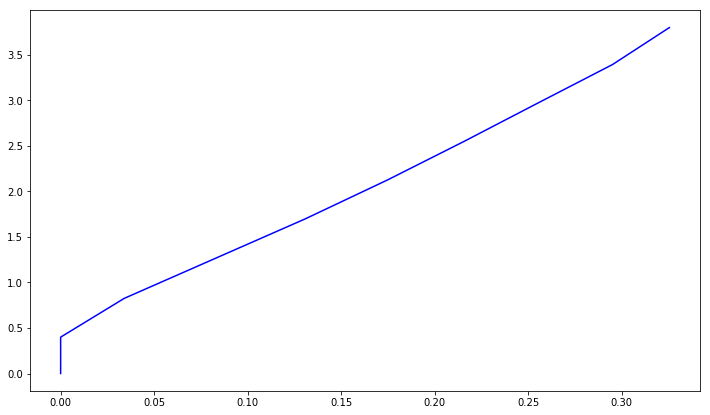

In [14]:
plt.figure(figsize=(12, 7))

plt.plot(inputs[30,:,0],inputs[30,:,1],c='b')
plt.plot(out[:,30,0],out[:,30,1],c = 'k')
plt.plot(gt[30,:,0],gt[30,:,1],c='r')
plt.axis('equal')

In [ ]:
out.shape

In [ ]:
out[:,20,:]

In [ ]:
inputs.shape

In [ ]:
a = np.array([[[1,2],[3,4],[5,6]],[[7,8],[9,0],[1,1]]])

In [ ]:
b = a.reshape(3,2,2)

In [ ]:
a.shape

In [ ]:
a

In [ ]:
b

In [ ]:
b = np.transpose(a, (1,0,2))

In [ ]:
inputs.permute([1,0,2])
